# Install files

In [ ]:
!pip install tensorflow_decision_forests
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 54.2 MB/s eta 0:00:00


# Data Loading and Exploratory Analysis

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import keras
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/221.csv')
df1.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,28,81,120,98,74,73,0
1,29,81,120,98,74,73,0
2,30,81,120,98,74,73,0
3,30,81,120,99,74,73,0
4,29,81,120,99,73,73,0


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/230.csv')
df2.head()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
0,15,54,73,97,72,71,0
1,15,54,73,97,72,71,0
2,15,54,73,97,72,71,0
3,15,54,73,97,72,71,0
4,15,55,74,97,72,71,0


**Exploration**

In [ ]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset shape: {df1.shape}")

# Display basic statistics
print(df1.describe())

# Check for column data types and missing values
print(df1.info())

# Display columns with missing values and their count
missing_data = df1.isnull().sum()
print(missing_data[missing_data > 0])

# Identify categorical and numerical columns
categorical_columns = df1.select_dtypes(include=['object']).columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns

print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

# Check unique values in categorical columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df1[col].nunique()}")
    print(df1[col].value_counts())


Dataset shape: (24999, 7)
               RESP          BP-S          BP-D          SpO2            HR  \
count  24999.000000  24999.000000  24999.000000  24999.000000  24999.000000   
mean      23.763951     83.889756    121.411656     99.041282     88.562342   
std        4.492832      4.746617      8.966590      1.304528      9.592311   
min        0.000000     66.000000     88.000000      0.000000      0.000000   
25%       21.000000     81.000000    114.000000     98.000000     81.000000   
50%       23.000000     83.000000    121.000000     99.000000     88.000000   
75%       26.000000     87.000000    129.000000    100.000000     95.000000   
max       42.000000    127.000000    170.000000    100.000000    120.000000   

              PULSE       Anomaly  
count  24999.000000  24999.000000  
mean      87.975439      0.065683  
std        9.219837      0.247731  
min        0.000000      0.000000  
25%       81.000000      0.000000  
50%       88.000000      0.000000  
75%       

In [ ]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset shape: {df2.shape}")

# Display basic statistics
print(df2.describe())

# Check for column data types and missing values
print(df2.info())

# Display columns with missing values and their count
missing_data = df2.isnull().sum()
print(missing_data[missing_data > 0])

# Identify categorical and numerical columns
categorical_columns = df2.select_dtypes(include=['object']).columns
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns

print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

# Check unique values in categorical columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df2[col].nunique()}")
    print(df2[col].value_counts())


Dataset shape: (25000, 7)
               RESP          BP-S          BP-D          SpO2            HR  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      17.621400     53.966440     73.920600     94.526280     77.004120   
std        3.560338      7.752623     10.038658      2.137993      6.611137   
min        0.000000     37.000000     52.000000     81.000000      0.000000   
25%       15.000000     50.000000     67.000000     93.000000     73.000000   
50%       17.000000     54.000000     73.000000     94.000000     76.000000   
75%       20.000000     60.000000     82.000000     96.000000     79.000000   
max       42.000000    211.000000    217.000000     99.000000    131.000000   

              PULSE       Anomaly  
count  25000.000000  25000.000000  
mean      76.180320      0.031480  
std        5.954691      0.174615  
min       54.000000      0.000000  
25%       72.000000      0.000000  
50%       75.000000      0.000000  
75%       

**Cleaning**

In [ ]:

df1_cleaned = df1.dropna()

df1[numerical_columns] = df1[numerical_columns].fillna(df1[numerical_columns].median())



In [ ]:

df2_cleaned = df2.dropna()

df2[numerical_columns] = df2[numerical_columns].fillna(df2[numerical_columns].median())

**Outlier detection**

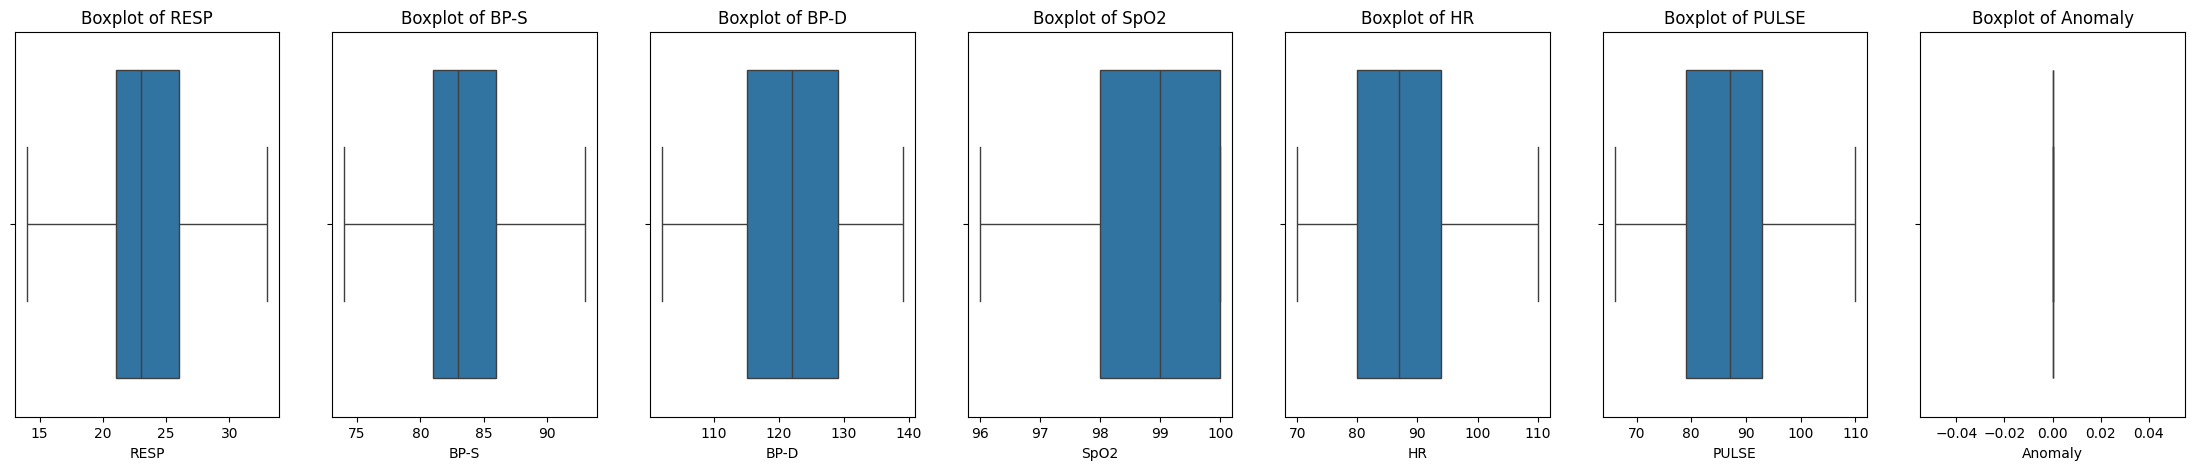

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Dataset shape after removing outliers: (22340, 7)


In [ ]:
# Boxplot for outlier detection in numerical columns

fig, axes = plt.subplots(1, 7, figsize=(28, 5))
n=0
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df1_cleaned[col], ax=axes[n])
    axes[n].set_title(f'Boxplot of {col}')
    n=n+1
plt.show()

Q1 = df1_cleaned[numerical_columns].quantile(0.25)
Q3 = df1_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df1_cleaned = df1_cleaned[~((df1_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df1_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after removing outliers: {df1_cleaned.shape}")


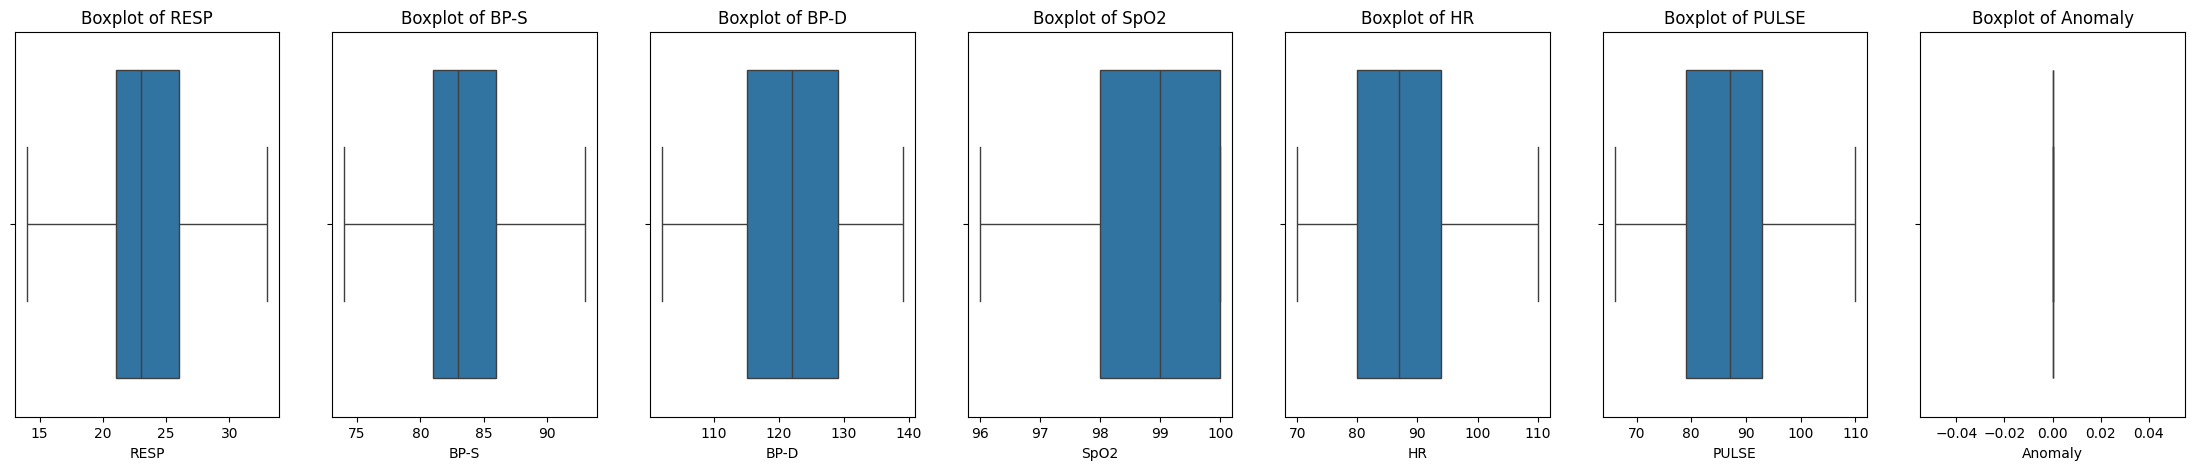

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Dataset shape after removing outliers: (22070, 7)


In [ ]:
# Boxplot for outlier detection in numerical columns

fig, axes = plt.subplots(1, 7, figsize=(28, 5))
n=0
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df1_cleaned[col], ax=axes[n])
    axes[n].set_title(f'Boxplot of {col}')
    n=n+1
plt.show()
Q1 = df2_cleaned[numerical_columns].quantile(0.25)
Q3 = df2_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df2_cleaned = df2_cleaned[~((df2_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df2_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after removing outliers: {df2_cleaned.shape}")


**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(df1_cleaned), columns=df1_cleaned.columns)

# Standardization
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(df1_cleaned), columns=df1_cleaned.columns)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(df2_cleaned), columns=df2_cleaned.columns)

# Standardization
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(df2_cleaned), columns=df2_cleaned.columns)

# ID3 Algorithm

**Using ID3 Algorithm on Patient 1** (Scikit-Learn Implementation)



Accuracy: 99.56%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4678
           1       0.96      0.97      0.97       322

    accuracy                           1.00      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       1.00      1.00      1.00      5000



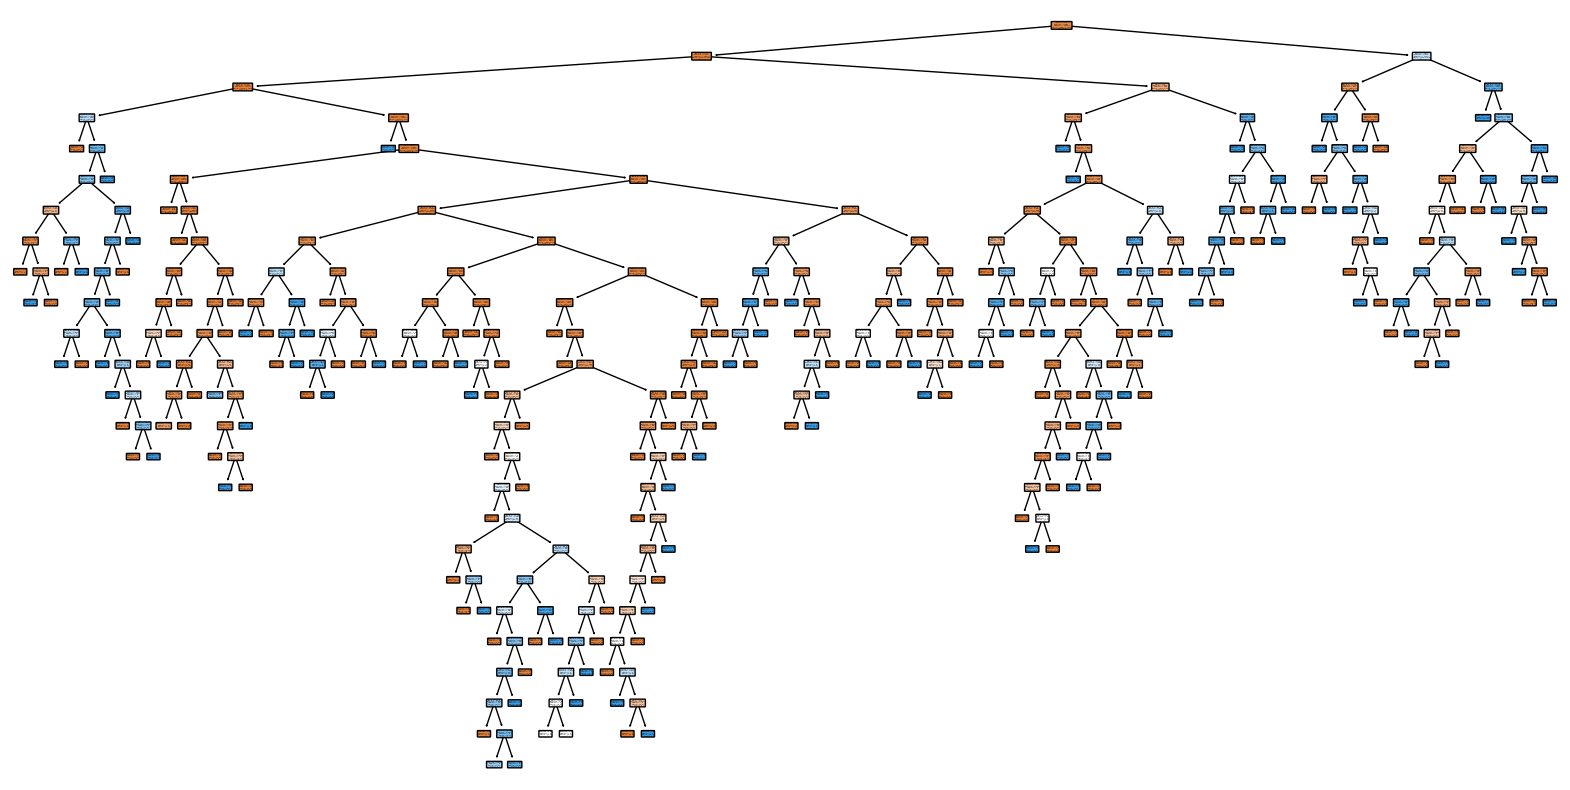

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

X = df1.drop(columns=['Anomaly'])
y = df1['Anomaly']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
=
if len(label_encoder.classes_) > 1:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Create a DecisionTreeClassifier using entropy (ID3-like behavior)
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print the classification report
    print("Classification Report:")
    # Convert label_encoder.classes_ to a list of strings
    target_names = [str(c) for c in label_encoder.classes_]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Visualize the decision tree
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf, feature_names=X.columns, class_names=target_names, filled=True, rounded=True)
    plt.show()
else:
    print("The target variable has only one unique value. Cannot generate a classification report.")

**ID3 Custom Implementation**

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import math

class ID3:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        data = X.copy()
        data['label'] = y
        self.tree = self._id3(data, data.columns[:-1], depth=0)

    def predict(self, X):
        return X.apply(self._predict_single, axis=1)

    def _predict_single(self, row):
        node = self.tree
        while isinstance(node, dict):
            feature = next(iter(node))
            if row[feature] in node[feature]:
                node = node[feature][row[feature]]
            else:
                return Counter(node[feature].values()).most_common(1)[0][0]
        return node

    def _id3(self, data, features, depth):
        # Stopping conditions
        labels = data['label']
        if len(set(labels)) == 1:  # Pure leaf
            return labels.iloc[0]
        if len(features) == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return self._majority_class(labels)

        # Select best feature to split on
        best_feature = self._best_feature(data, features)
        tree = {best_feature: {}}

        for value in data[best_feature].unique():
            subset = data[data[best_feature] == value]
            if subset.empty:
                tree[best_feature][value] = self._majority_class(labels)
            else:
                tree[best_feature][value] = self._id3(subset, features.drop(best_feature), depth + 1)

        return tree

    def _best_feature(self, data, features):
        base_entropy = self._entropy(data['label'])
        gains = {}
        for feature in features:
            gains[feature] = self._information_gain(data, feature, base_entropy)
        return max(gains, key=gains.get)

    def _information_gain(self, data, feature, base_entropy):
        values, counts = np.unique(data[feature], return_counts=True)
        weighted_entropy = sum(
            (counts[i] / np.sum(counts)) * self._entropy(data.where(data[feature] == v).dropna()['label'])
            for i, v in enumerate(values)
        )
        return base_entropy - weighted_entropy

    def _entropy(self, labels):
        label_counts = Counter(labels)
        total = len(labels)
        entropy = -sum((count / total) * math.log2(count / total) for count in label_counts.values())
        return entropy

    def _majority_class(self, labels):
        return Counter(labels).most_common(1)[0][0]


# Load the dataset
def load_data(filename):
    data = pd.read_csv(filename)

    # Assume the last column is the target label
    X = data.iloc[:, :-1]  # All columns except the last
    y = data.iloc[:, -1]   # Last column (target)

    return X, y

# Example usage
if __name__ == "__main__":=
    X, y = load_data('/content/drive/MyDrive/221.csv')

    # Train ID3 algorithm
    id3 = ID3(max_depth=3)
    id3.fit(X, y)
    test_data = pd.read_csv('/content/drive/MyDrive/221.csv')

    # Predict using the model
    predictions = id3.predict(test_data)
    print("Predictions:", predictions)


Predictions: 0        0
1        0
2        0
3        0
4        0
        ..
24994    0
24995    0
24996    0
24997    0
24998    0
Length: 24999, dtype: int64


# CART Implementation

**CART** using Scikit-Learn's DecisionTreeClassifier (for patient 2)

Accuracy: 99.46%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4832
           1       0.92      0.92      0.92       168

    accuracy                           0.99      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.99      0.99      0.99      5000



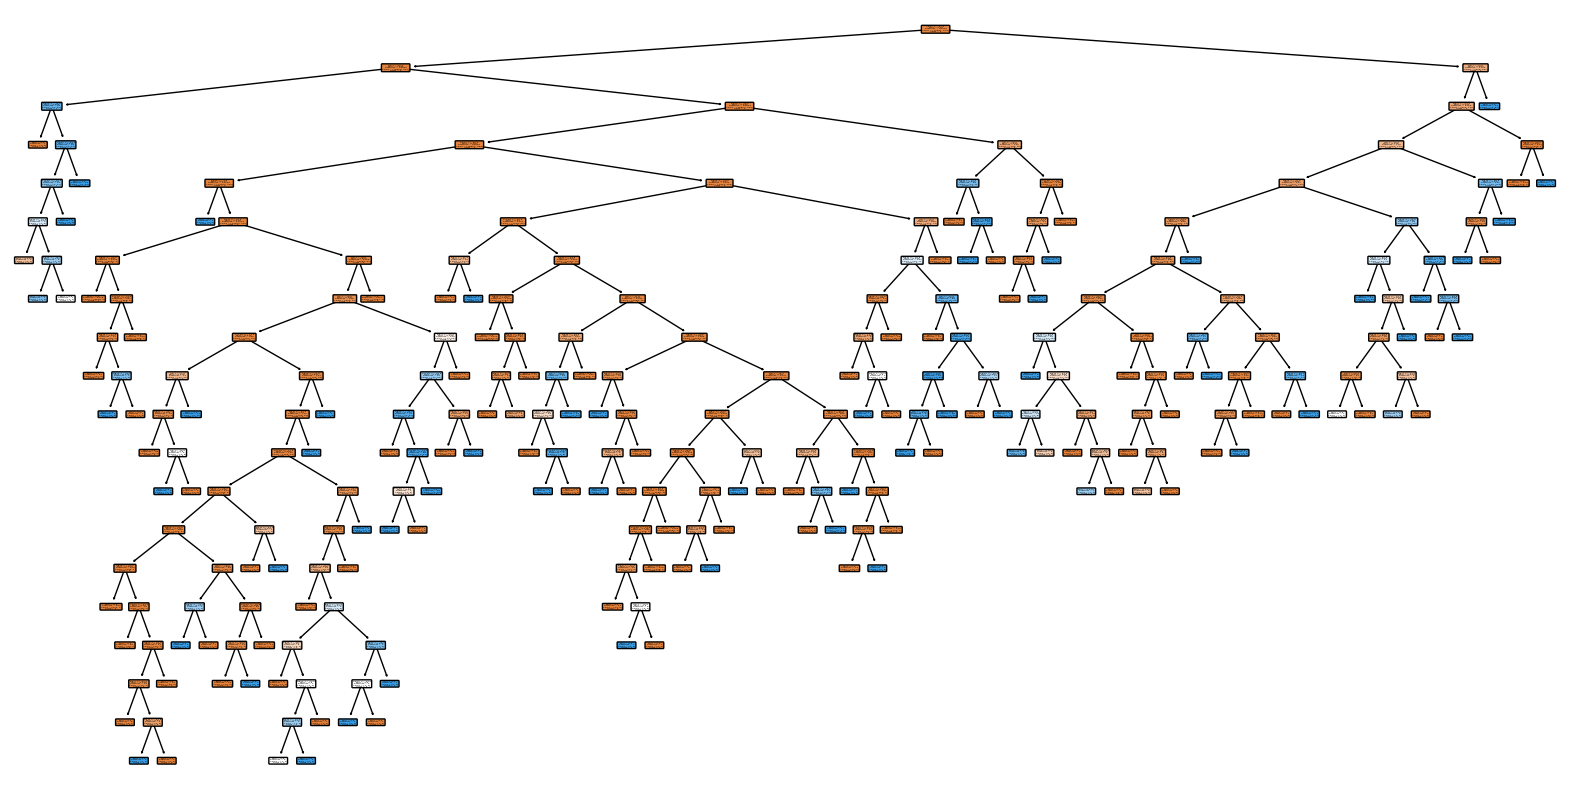

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

X = df2.drop(columns=['Anomaly'])
y = df2['Anomaly']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier using the default (CART - Gini Impurity)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
target_names = [str(c) for c in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(20,10))
class_names = [str(c) for c in label_encoder.classes_]
tree.plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()


**CART** using Tensorflow CartModel (for patient 2)

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

X = df2.drop(columns=['Anomaly'])
y = df2['Anomaly']

# Encode the target variable if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Combine X and y back into DataFrames for TensorFlow Decision Forests
train_data = pd.concat([X_train, pd.Series(y_train, name="Anomaly")], axis=1)
test_data = pd.concat([X_test, pd.Series(y_test, name="Anomaly")], axis=1)

# Handle missing values in the target variable (e.g., drop rows with missing values) in the training data
train_data = train_data.dropna(subset=['Anomaly'])

# Convert the training and testing sets into TensorFlow datasets
# Set batch_size to a larger value to potentially improve performance
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Anomaly")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Anomaly")

tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(df2, label="Anomaly")

model = tfdf.keras.CartModel()
model.fit(tf_dataset)

print(model.summary())

model.make_inspector().evaluation()

Use /tmp/tmphbqmt5q8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.327711. Found 25000 examples.
Training model...
Model trained in 0:00:00.097894
Compiling model...
Model compiled.
Model: "cart_model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	BP-D
	BP-S
	HR
	PULSE
	Patient
	RESP
	SpO2

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "SpO2"  1.000000 ################
    2.    "HR"  0.339869 ###
    3.  "BP-D"  0.202335 #
    4.  "RESP"  0.196970 #
    5.  "BP-S"  0.147727 
    6. "PULSE"  0.139037 

Variable Importance: NUM_AS_ROOT:
    1. "SpO2"  1.000000 

Variable Importance: NUM_NODES:
    1

Evaluation(num_examples=2477, accuracy=0.9951554299555915, loss=0.06551288703818434, rmse=None, ndcg=None, aucs=[0.0, 0.9566448470942853, 0.9566448470942852], auuc=None, qini=None)

# Analysis

ID3 (Iterative Dichotomiser 3) and CART (Classification and Regression Trees) are both decision tree algorithms used for supervised learning tasks. They share a common purpose — to build a tree-based model for classification or regression — but they differ in several key aspects such as splitting criteria, output types, and tree structure.

**Splitting Criteria**:


*   ID3 uses Information Gain
*   CART uses Gini Impurity or MSE (Mean Squared Error)

**Type of Output:**

ID3 is strictly a classification algorithm. It builds a tree where the leaves represent class labels, and it is not capable of handling regression tasks.

CART can handle both classification and regression.
For classification, the tree outputs class labels at the leaves.
For regression, it outputs continuous values (e.g., averages of target values) at the leaves.


**Tree Structure and Growth:**

ID3 does not produce binary trees. The number of branches depends on the number of unique values of the feature selected for splitting.
The tree can grow into a multi-way tree, meaning that splits can have multiple branches corresponding to the different values of a categorical feature.

CART always produces a binary tree. Each node splits the dataset into two groups (left and right).
This binary structure leads to more compact trees, which can be more efficient for searching and traversing the tree.

**Pruning and Overfitting:**

In its original form, ID3 does not include pruning mechanisms. It grows the tree until it perfectly classifies the training data, leading to potential overfitting.
Later variants (like C4.5) added pruning techniques, but ID3 itself is prone to overfitting if the tree becomes too complex.


CART has a built-in pruning mechanism. It builds the tree to full depth and then prunes it back by removing splits that don’t provide significant improvement.
It uses cost complexity pruning, which minimizes the error by balancing the tree's size and accuracy on the training data.
Analysis:

CART’s pruning method helps reduce overfitting by balancing complexity and performance. In contrast, ID3 tends to overfit without additional pruning techniques

**Conclusion:**

ID3 is well-suited for small, categorical datasets with clear and limited features. However, it tends to overfit without pruning, and it requires preprocessing when dealing with continuous data.

CART is more flexible, efficient, and robust. It can handle both classification and regression tasks, work with continuous and categorical data, and automatically prunes to avoid overfitting. Its binary trees are more interpretable and easier to work with in most practical applications.

For the given datasets,

*   ID3 on Patient 1 has an accuracy of 99.56%,
*   CART on Patient 2 (Decision Tree Scikit Learn) has an accuracy of 99.46%
*   CART on Patient 2 (TFDF) has an accuracy of 99.51%






# Training a Random Forest model using TensorFlow's Decision Forests library

**Training a Random Forest model using TensorFlow's Decision Forests library on the patient-1 training data**

In [ ]:
import pandas as pd
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

X = df1.drop(columns=['Anomaly'])  # Features
y = df1['Anomaly']  # Target variable

# Encode the target variable if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Combine X and y back into DataFrames for TensorFlow Decision Forests
train_data = pd.concat([X_train, pd.Series(y_train, name="Anomaly")], axis=1)
test_data = pd.concat([X_test, pd.Series(y_test, name="Anomaly")], axis=1)

# Handle missing values in the target variable (if any)
train_data = train_data.dropna(subset=['Anomaly'])

# Convert the training and testing sets into TensorFlow datasets
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Anomaly")
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Anomaly")

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_dataset)

model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_dataset, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

model_1.save("/tmp/my_saved_model")
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

Use 2 thread(s) for training
Use /tmp/tmp_ip7g8y4 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'RESP': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'BP-S': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'BP-D': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'SpO2': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'HR': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'PULSE': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Patient': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>}
Label: Tensor("data_7:0", shape=(None,), dtype=float64)
Weights: None
Normalized tensor features:
 {'RESP': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'BP-S': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'BP-D': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dt

2024-09-17 14:43:02.973552: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1234] Loading model from path /tmp/tmp_ip7g8y4/model/ with prefix 755f5e2620c24af3
I0000 00:00:1726584183.397040     222 decision_forest.cc:761] Model loaded with 300 root(s), 213140 node(s), and 6 input feature(s).
I0000 00:00:1726584183.397095     222 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-17 14:43:03.397122: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model trained in 0:00:10.633367
Compiling model...
Model compiled.
9/9 [==============================] - 1s 41ms/step - loss: 0.0000e+00 - accuracy: 0.5210

loss: 0.0000
accuracy: 0.5210


# Hypothesis Space

**Hypothesis space**

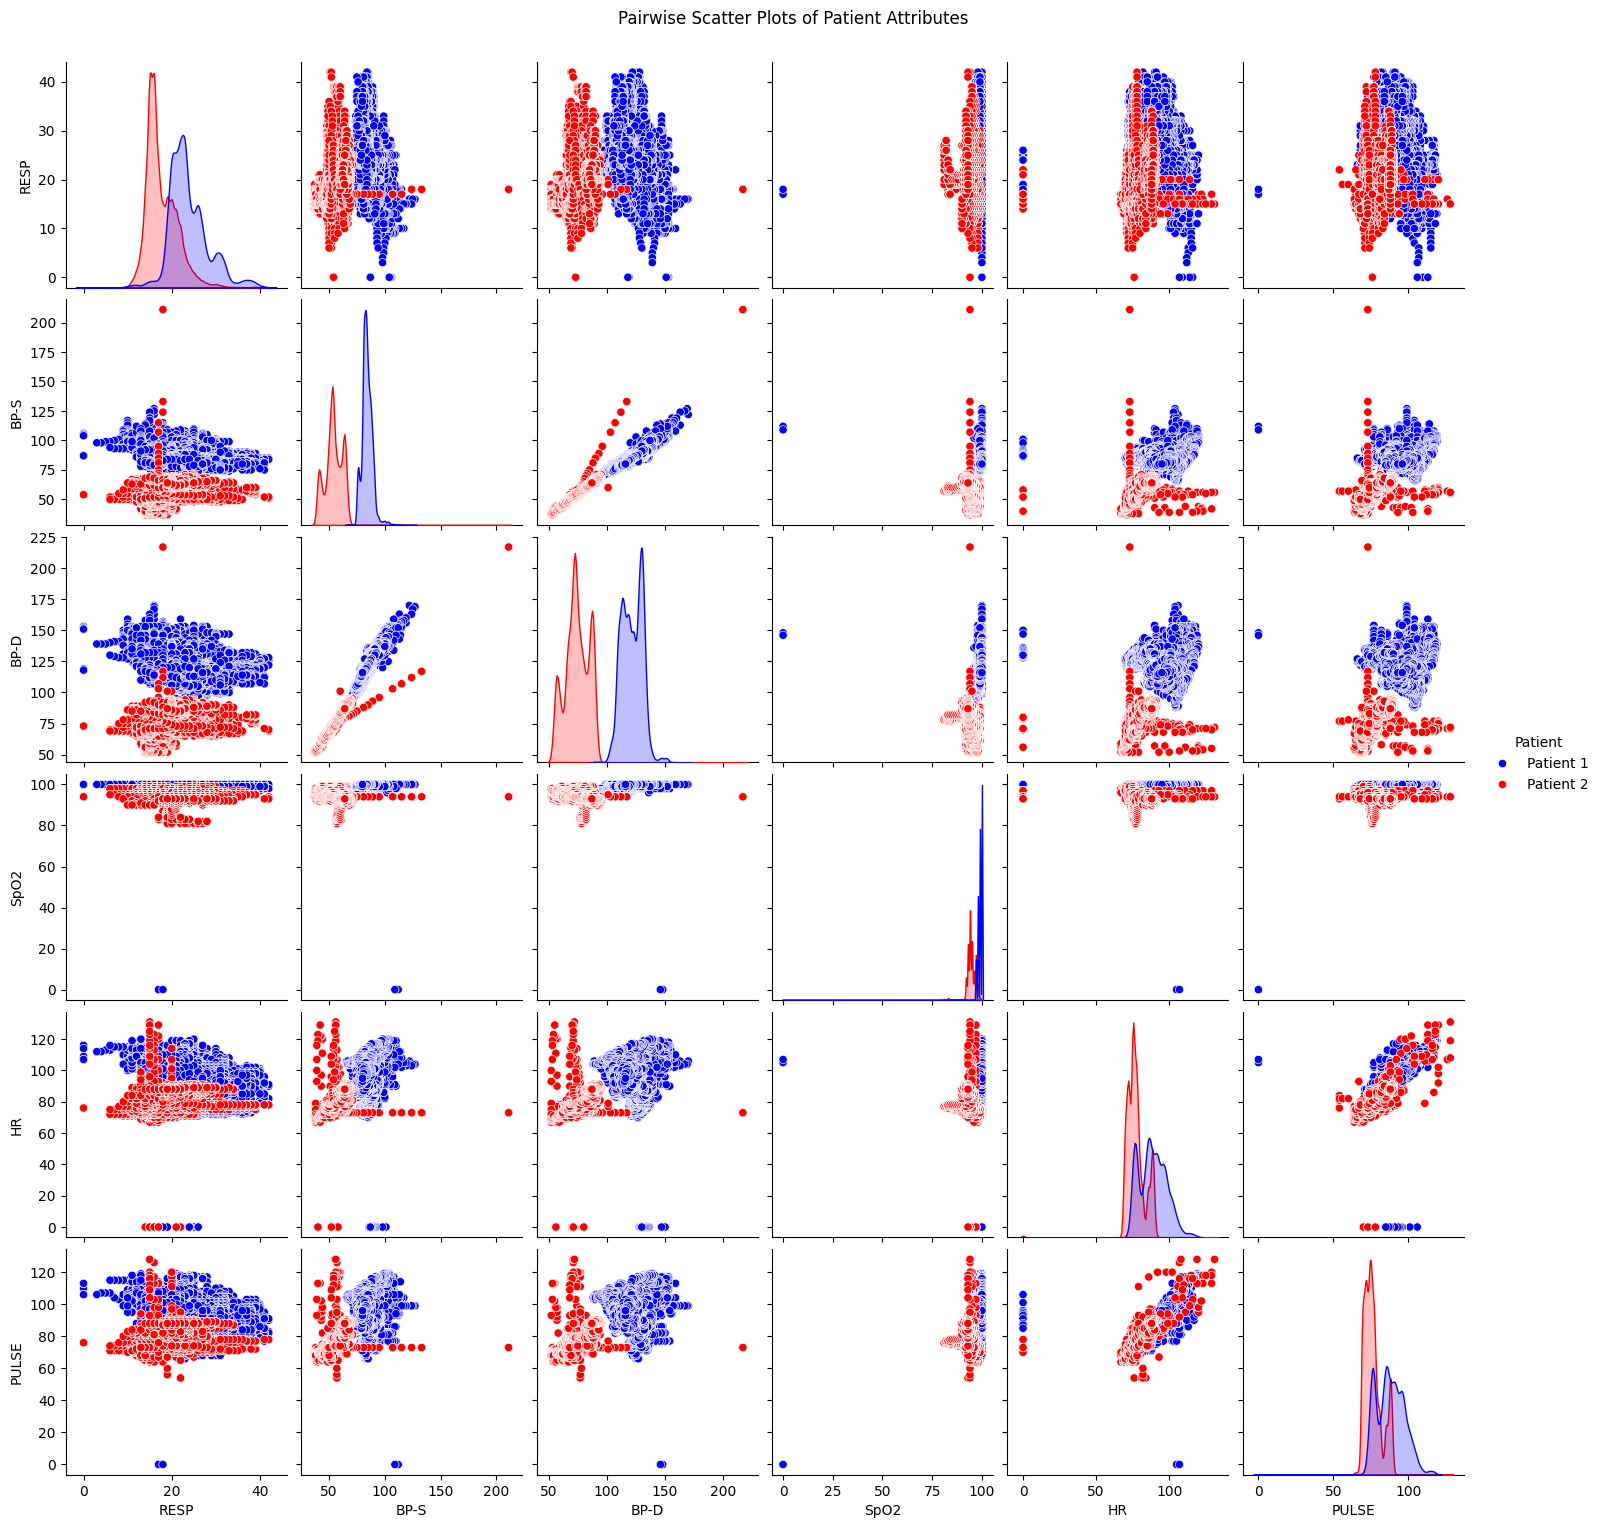

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined dataframe for visualization
df1['Patient'] = 'Patient 1'
df2['Patient'] = 'Patient 2'
df_combined = pd.concat([df1, df2])

# List of attributes to plot
attributes = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']

# Create pairwise scatter plots
sns.pairplot(df_combined, hue='Patient', vars=attributes, palette={'Patient 1': 'blue', 'Patient 2': 'red'})

# Display the plots
plt.suptitle('Pairwise Scatter Plots of Patient Attributes', y=1.02)
plt.show()


# Gradient Boosted Decision Trees (GBDT)

**Gradient Boosted Decision Trees (GBDT)**

Model: GBDT (n_estimators=100, lr=0.1, max_depth=3)
Accuracy: 0.9870, Log Loss: 0.0398

Model: GBDT (n_estimators=200, lr=0.05, max_depth=4)
Accuracy: 0.9944, Log Loss: 0.0243

Model: GBDT (n_estimators=300, lr=0.01, max_depth=5)
Accuracy: 0.9870, Log Loss: 0.0388

Model: Random Forest (n_estimators=100, max_depth=10)
Accuracy: 0.9944, Log Loss: 0.0217



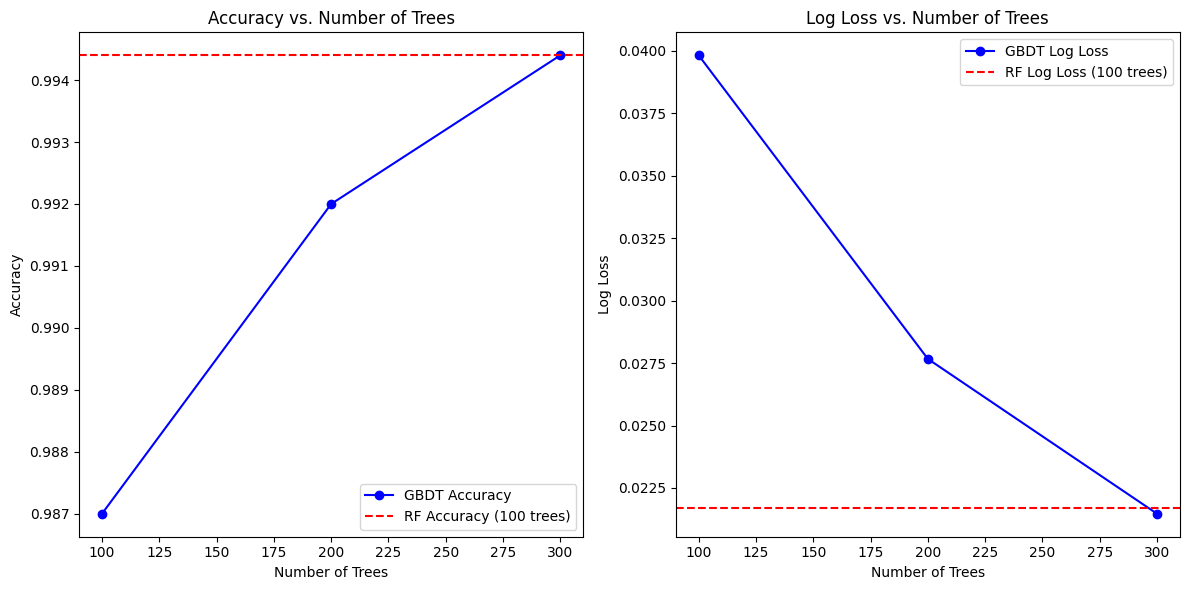

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

X = df2.drop(columns=['Anomaly', 'Patient'])
y = df2['Anomaly']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate accuracy and log loss
    accuracy = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)

    return accuracy, logloss

# Initialize lists to store results for plotting
n_estimators_list = [100, 200, 300]
gbdt_accuracies = []
gbdt_log_losses = []
rf_accuracy = rf_logloss = None

# Train GBDT models with different hyperparameters
for n_estimators in n_estimators_list:
    gbdt = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=3, random_state=42)
    accuracy, logloss = train_and_evaluate(gbdt, X_train, y_train, X_test, y_test)
    gbdt_accuracies.append(accuracy)
    gbdt_log_losses.append(logloss)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_accuracy, rf_logloss = train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)

for model_name, accuracy, logloss in results:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Log Loss: {logloss:.4f}\n")

# Plot accuracy vs. number of trees
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_list, gbdt_accuracies, marker='o', linestyle='-', color='blue', label='GBDT Accuracy')
plt.axhline(y=rf_accuracy, color='red', linestyle='--', label='RF Accuracy (100 trees)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.legend()

# Plot log loss vs. number of trees
plt.subplot(1, 2, 2)
plt.plot(n_estimators_list, gbdt_log_losses, marker='o', linestyle='-', color='blue', label='GBDT Log Loss')
plt.axhline(y=rf_logloss, color='red', linestyle='--', label='RF Log Loss (100 trees)')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Number of Trees')
plt.legend()

plt.tight_layout()
plt.show()


**Relative importance of each feature**

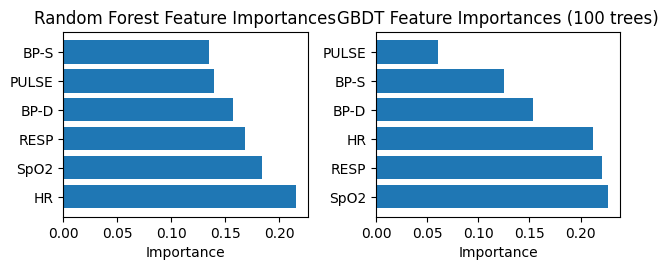

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

X = df2.drop(columns=['Anomaly', 'Patient'])
y = df2['Anomaly']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate accuracy and log loss
    accuracy = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)

    return accuracy, logloss

# Initialize lists to store results for plotting
n_estimators_list = [100, 200, 300]
gbdt_accuracies = []
gbdt_log_losses = []
gbdt_feature_importances = []
rf_accuracy = rf_logloss = rf_feature_importances = None

# Train GBDT models with different hyperparameters
for n_estimators in n_estimators_list:
    gbdt = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=3, random_state=42)
    accuracy, logloss = train_and_evaluate(gbdt, X_train, y_train, X_test, y_test)
    gbdt_accuracies.append(accuracy)
    gbdt_log_losses.append(logloss)
    gbdt_feature_importances.append(gbdt.feature_importances_)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_accuracy, rf_logloss = train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)
rf_feature_importances = rf_model.feature_importances_

# Plot feature importances for Random Forest
plt.subplot(2, 2, 3)
features = X.columns
indices = np.argsort(rf_feature_importances)[::-1]
plt.barh(range(len(indices)), rf_feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')

# Plot feature importances for GBDT
plt.subplot(2, 2, 4)
gbdt_importances = gbdt_feature_importances[0]
indices = np.argsort(gbdt_importances)[::-1]
plt.barh(range(len(indices)), gbdt_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.title('GBDT Feature Importances (100 trees)')

plt.tight_layout()
plt.show()
